In [8]:
import pandas as pd
import os

#  the path to the directory containing your CSV files
path_to_directory = r'C:\Users\S554035\Documents\BigDataProject'
os.chdir(path_to_directory)

# To check the current directory to confirm it's set correctly
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# attempt to load your files
data_party1 = pd.read_csv('bjp_tweets.csv')
data_party2 = pd.read_csv('congress_tweets.csv')



Current Directory: C:\Users\S554035\Documents\BigDataProject


In [6]:
#Step 1: Data Preprocessing

In [8]:
#1.2 Initial Data Inspection
#Before cleaning, it's good to inspect the data to understand its structure.

In [9]:
print(data_party1.head())  # Prints first few rows of the dataset for party 1
print(data_party2.head())  # Prints first few rows of the dataset for party 2

# Check for missing values
print(data_party1.isnull().sum())
print(data_party2.isnull().sum())


   Unnamed: 0                                              tweet  target
0           0  ndtv anchor let go over to aap live press conf...       0
1           1  sambit patra attacks rahul gandhi over his cow...       0
2           2  crediting the bjp with taking development to s...       1
3           3  ktrbrs do do false allegations on iasassociati...       0
4           4  gujarat assembly yet to get rs cr as gst compe...       1
   Unnamed: 0                                              tweet  target
0           0  spending shocker cbo latest debt projection sh...       0
1           1  will you vote for congress in 2024 congress co...       1
2           2        triviapotus we need termlimits for congress       1
3           3  eam s jaishankar hit out at congress for quad ...       0
4           4  is this why congress supported amp celebrated ...       1
Unnamed: 0    0
tweet         0
target        0
dtype: int64
Unnamed: 0    0
tweet         0
target        0
dtype: int64


In [11]:
#1.3 Text Cleaning
#Cleaning the text data is crucial for NLP(Natural Language Processing) tasks.
#Here's a function to clean the tweets by removing URLs, special characters, and converting them to lowercase.

In [10]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Remove punctuation and numbers
    return text

# Apply the cleaning function to your tweet column
# Replace 'tweet_column' with your actual tweet column name
data_party1['tweet'] = data_party1['tweet'].apply(clean_text)
data_party2['tweet'] = data_party2['tweet'].apply(clean_text)


In [4]:
print(data_party1.head())
print(data_party2.head())

   Unnamed: 0                                              tweet  target
0           0  ndtv anchor let go over to aap live press conf...       0
1           1  sambit patra attacks rahul gandhi over his cow...       0
2           2  crediting the bjp with taking development to s...       1
3           3  ktrbrs do do false allegations on iasassociati...       0
4           4  gujarat assembly yet to get rs cr as gst compe...       1
   Unnamed: 0                                              tweet  target
0           0  spending shocker cbo latest debt projection sh...       0
1           1  will you vote for congress in  congress congre...       1
2           2        triviapotus we need termlimits for congress       1
3           3  eam s jaishankar hit out at congress for quad ...       0
4           4  is this why congress supported amp celebrated ...       1


In [15]:
#Final Data Inspection
#After cleaning, take another look at your data to ensure the cleaning process worked as expected.

In [11]:
print(data_party1.head())
print(data_party2.head())

   Unnamed: 0                                              tweet  target
0           0  ndtv anchor let go over to aap live press conf...       0
1           1  sambit patra attacks rahul gandhi over his cow...       0
2           2  crediting the bjp with taking development to s...       1
3           3  ktrbrs do do false allegations on iasassociati...       0
4           4  gujarat assembly yet to get rs cr as gst compe...       1
   Unnamed: 0                                              tweet  target
0           0  spending shocker cbo latest debt projection sh...       0
1           1  will you vote for congress in  congress congre...       1
2           2        triviapotus we need termlimits for congress       1
3           3  eam s jaishankar hit out at congress for quad ...       0
4           4  is this why congress supported amp celebrated ...       1


In [ ]:
pip install pandas nltk


In [1]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Exploratory Data Analysis (EDA)
#Descriptive Statistics: Analyze basic statistics like the number of tweets, 
#average length of tweets, and the distribution of positive vs negative tweets for each party.
#Initial Visualization: Use Matplotlib or Seaborn to create histograms, 
#bar charts, or pie charts to visualize these basic statistics

Party 1 Statistics:
Total Tweets: 49477
Average Tweet Length: 165.24 characters
Positive Tweets: 22962
Negative Tweets: 26515


Party 2 Statistics:
Total Tweets: 30252
Average Tweet Length: 160.22 characters
Positive Tweets: 14240
Negative Tweets: 16012




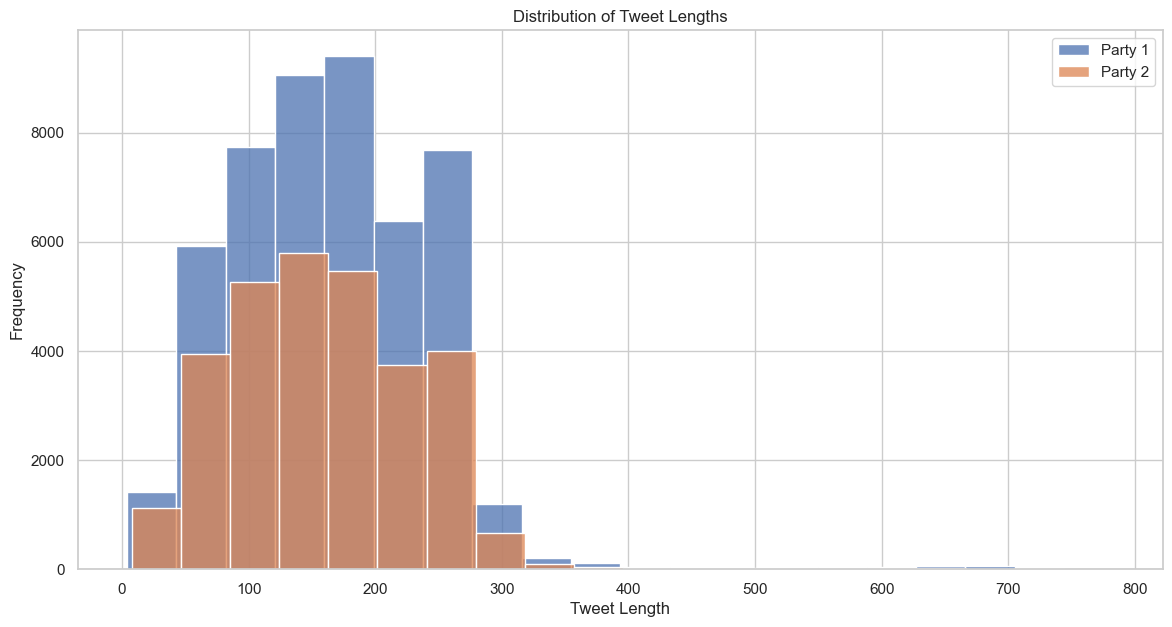

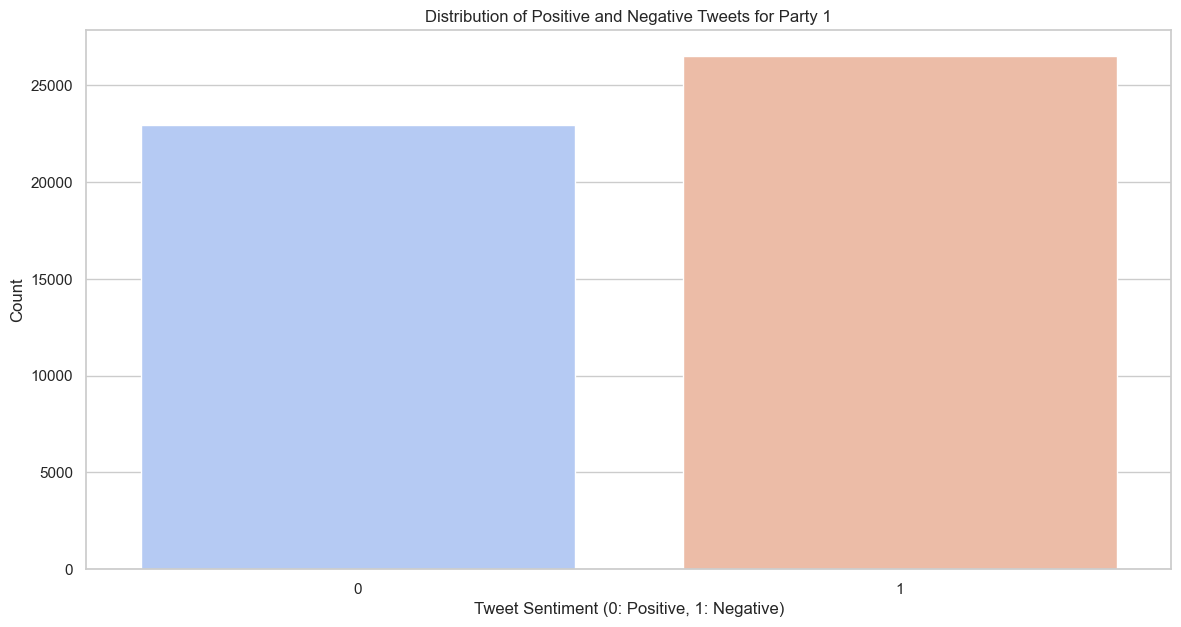

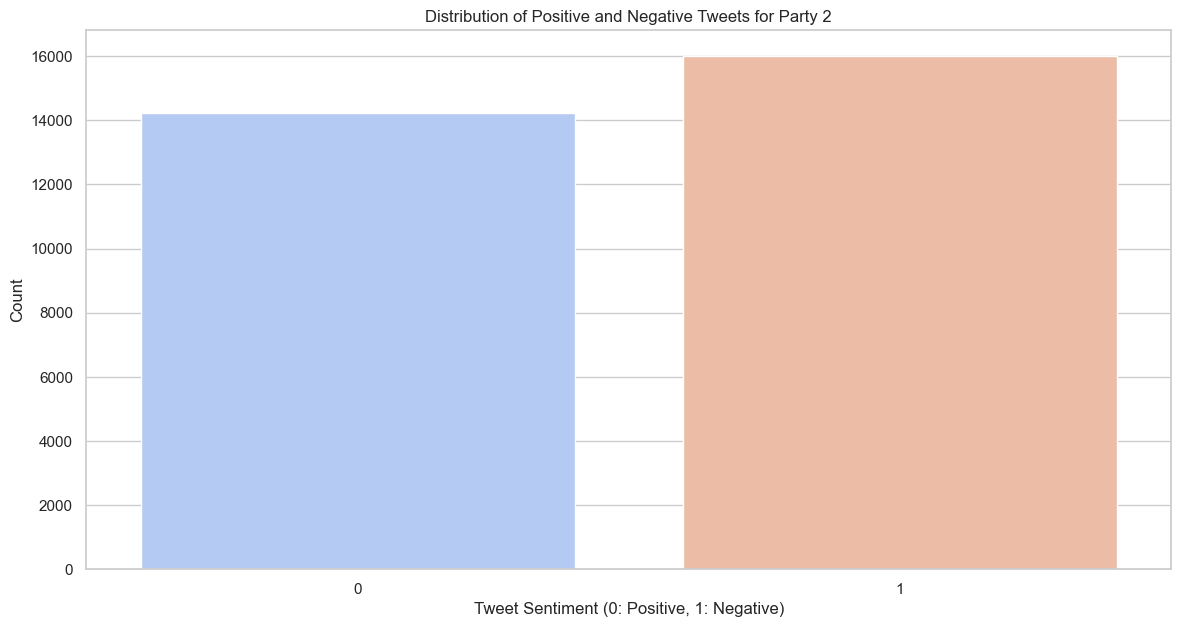

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already loaded in data_party1 and data_party2 DataFrames
# And assuming the 'tweet_column' is already cleaned

# Descriptive Statistics
def tweet_statistics(data, party_name):
    total_tweets = len(data)
    avg_length = data['tweet'].apply(len).mean()
    positive_tweets = data[data['target'] == 0]['target'].count()
    negative_tweets = data[data['target'] == 1]['target'].count()
    
    print(f"{party_name} Statistics:")
    print(f"Total Tweets: {total_tweets}")
    print(f"Average Tweet Length: {avg_length:.2f} characters")
    print(f"Positive Tweets: {positive_tweets}")
    print(f"Negative Tweets: {negative_tweets}")
    print("\n")

# Calculate statistics for both parties
tweet_statistics(data_party1, "Party 1")
tweet_statistics(data_party2, "Party 2")

# Visualization
def plot_tweet_distributions(data_party1, data_party2):
    # Set the style for seaborn
    sns.set(style="whitegrid")

    plt.figure(figsize=(14, 7))
    sns.histplot(data_party1['tweet'].apply(len), bins=20, label='Party 1', kde=False)
    sns.histplot(data_party2['tweet'].apply(len), bins=20, label='Party 2', kde=False)
    plt.title('Distribution of Tweet Lengths')
    plt.xlabel('Tweet Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    # Plotting the distribution of positive vs negative tweets for both parties
    plt.figure(figsize=(14, 7))

    # Positive vs Negative distribution for Party 1
    sns.countplot(x='target', data=data_party1, palette='coolwarm', label='Party 1')
    plt.title('Distribution of Positive and Negative Tweets for Party 1')
    plt.xlabel('Tweet Sentiment (0: Positive, 1: Negative)')
    plt.ylabel('Count')
    plt.show()

    # Positive vs Negative distribution for Party 2
    plt.figure(figsize=(14, 7))
    sns.countplot(x='target', data=data_party2, palette='coolwarm', label='Party 2')
    plt.title('Distribution of Positive and Negative Tweets for Party 2')
    plt.xlabel('Tweet Sentiment (0: Positive, 1: Negative)')
    plt.ylabel('Count')
    plt.show()

# Call the function to plot distributions
plot_tweet_distributions(data_party1, data_party2)


In [ ]:
#Step 3: Sentiment Analysis

In [5]:
#1. Verify Sentiment Labels

In [13]:
# Sample some tweets from each party
sample_party1 = data_party1[['tweet', 'target']].sample(5)
sample_party2 = data_party2[['tweet', 'target']].sample(5)

print("Sample tweets from Party 1:")
print(sample_party1)
print("\nSample tweets from Party 2:")
print(sample_party2)


Sample tweets from Party 1:
                                                   tweet  target
45377  narendramodi sampitroda comments show the rott...       0
5411   panicki pak pakistan parliamentarian claim tal...       1
36090  rahulgandhi rahul keeps lying about modi  time...       0
6887        masseysahib vote modi thank advicewil repeat       1
32376  congbasicincomevow actually will motivate midd...       1

Sample tweets from Party 2:
                                                   tweet  target
25053  evm working fine at our constituency loksabhae...       1
19896  renewindia mkstalin rahulgandhi supporters of ...       0
23127  they did it long ago the campaign was official...       1
14197  pic mms reach congress work committe meet ye f...       1
21750  mkvenu  what the prime minister has said is al...       1


In [8]:
#2. Sentiment Distribution

In [14]:
# Calculate proportions for Party 1
positive_tweets_party1 = data_party1[data_party1['target'] == 0]['target'].count()
negative_tweets_party1 = data_party1[data_party1['target'] == 1]['target'].count()
total_tweets_party1 = len(data_party1)
proportion_positive_party1 = positive_tweets_party1 / total_tweets_party1
proportion_negative_party1 = negative_tweets_party1 / total_tweets_party1

# Calculate proportions for Party 2
positive_tweets_party2 = data_party2[data_party2['target'] == 0]['target'].count()
negative_tweets_party2 = data_party2[data_party2['target'] == 1]['target'].count()
total_tweets_party2 = len(data_party2)
proportion_positive_party2 = positive_tweets_party2 / total_tweets_party2
proportion_negative_party2 = negative_tweets_party2 / total_tweets_party2

print("Sentiment Proportions for Party 1: Positive - {:.2f}, Negative - {:.2f}".format(proportion_positive_party1, proportion_negative_party1))
print("Sentiment Proportions for Party 2: Positive - {:.2f}, Negative - {:.2f}".format(proportion_positive_party2, proportion_negative_party2))


Sentiment Proportions for Party 1: Positive - 0.46, Negative - 0.54
Sentiment Proportions for Party 2: Positive - 0.47, Negative - 0.53


In [10]:
#b. Visualizing Sentiment Distribution

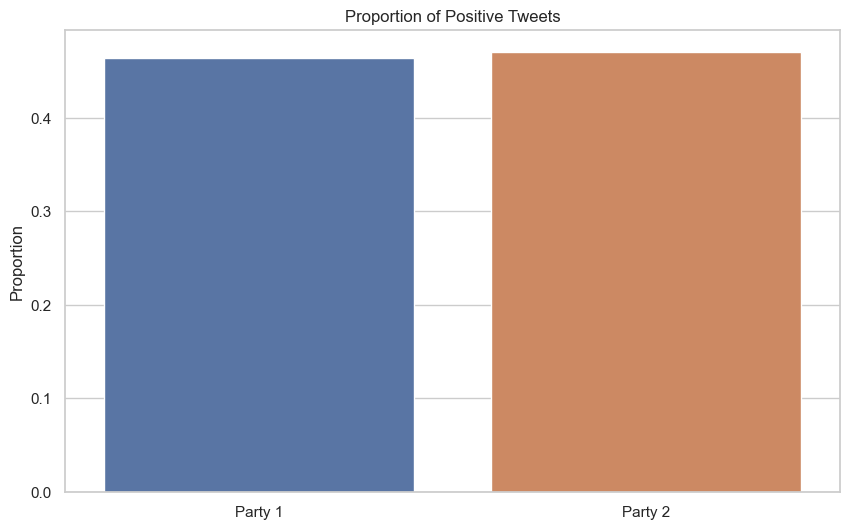

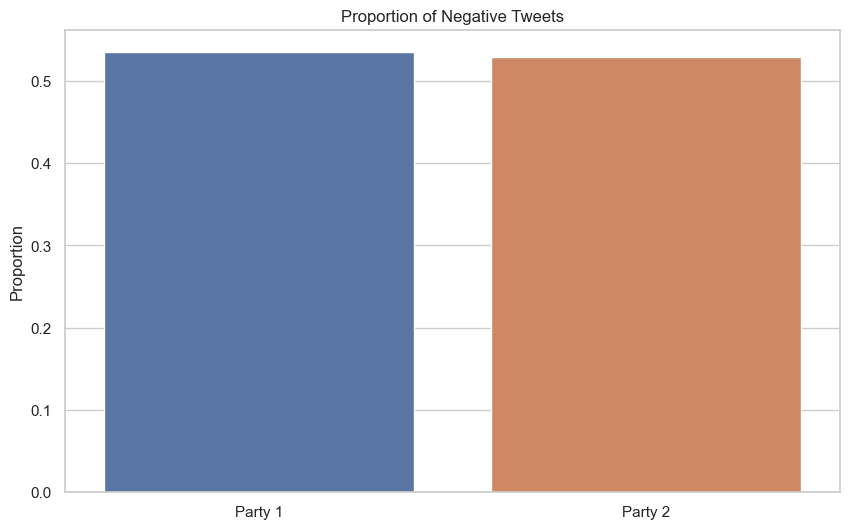

In [15]:
# Visualization using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=['Party 1', 'Party 2'], y=[proportion_positive_party1, proportion_positive_party2])
plt.title('Proportion of Positive Tweets')
plt.ylabel('Proportion')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Party 1', 'Party 2'], y=[proportion_negative_party1, proportion_negative_party2])
plt.title('Proportion of Negative Tweets')
plt.ylabel('Proportion')
plt.show()


In [15]:
#This analysis and visualization will help you compare whether one party's tweets are generally more positive or negative than the other's.
#Remember, the accuracy of this analysis depends on the accuracy of the sentiment labels in your dataset.

In [ ]:
#Step 4: Advanced Text Analysis
#1.1 Install Required Libraries

In [16]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#1.2 Import Libraries and Download Necessary Resources

In [16]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S554035\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
#1.3 Define a Function to Extract Keywords

In [17]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)


{'i', 'aren', 've', 'he', 'own', 'mightn', "aren't", 'than', "shouldn't", 'wouldn', 'not', 'each', 'isn', 'hers', 'she', "it's", 'with', 'should', 'won', 'off', 'down', 'if', 'ma', 'such', 'few', 'mustn', 'as', 'any', "don't", "weren't", 'having', 'ain', 'hasn', 'his', "you'll", 'her', "hasn't", "mustn't", "that'll", 'when', 'yours', 'for', 'their', 'over', 'why', 'most', 'out', 'has', 'were', 'but', 'themselves', 'too', 'before', 'yourselves', 'how', 'do', 'about', 'more', 's', 'did', 'a', 'up', 'which', 'or', 'me', 'was', 'didn', 'just', 'to', 'on', 'very', "haven't", 'until', 'been', 'during', 'nor', "won't", "mightn't", 'them', 'an', 'will', 'had', 'yourself', 'only', "you'd", "you're", 'through', 'no', 'those', 'd', 'o', 'then', 'of', "doesn't", "wasn't", "didn't", 'being', 'there', 'be', "you've", 'so', 'at', 'now', 'here', "needn't", 'myself', 'is', 'against', 'and', 'll', 'while', 'its', 'same', 'you', 'theirs', 'under', 'whom', "isn't", 'y', 'itself', 'can', "she's", 'that', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S554035\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download and store English stopwords
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

def get_keywords(data):
    words = []
    for tweet in data['tweet']:
        # Extract words from each tweet
        tweet_words = tweet.split()
        # Remove stopwords and non-alphabetic words
        words.extend([word for word in tweet_words if word.isalpha() and word not in english_stopwords])
    
    return Counter(words)

# Get keywords for each party
keywords_party1 = get_keywords(data_party1)
keywords_party2 = get_keywords(data_party2)

# Print most common keywords
print("Most common keywords for Party 1:", keywords_party1.most_common(10))
print("Most common keywords for Party 2:", keywords_party2.most_common(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S554035\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common keywords for Party 1: [('modi', 28158), ('narendramodi', 22088), ('bjp', 19661), ('pm', 12273), ('loksabhaelections', 10514), ('india', 9970), ('amp', 9115), ('rahulgandhi', 5921), ('vote', 5722), ('ji', 5316)]
Most common keywords for Party 2: [('congress', 16748), ('rahulgandhi', 16695), ('rahul', 9877), ('gandhi', 9237), ('loksabhaelections', 5503), ('bjp', 5223), ('incindia', 4696), ('amp', 4687), ('narendramodi', 3561), ('india', 3397)]


In [7]:
#Topic Modeling and Named Entity Recognition (NER)
#are advanced techniques in the field of Natural Language Processing (NLP)
#that help uncover deeper insights from text data

In [8]:
"""One common approach is the Latent Dirichlet Allocation (LDA) model.
LDA assumes that each document is a mixture of a small number of topics
and that each word in the document is attributable to one of the document's topics. 
It then attempts to reverse-engineer this process to determine what the topics 
"""

"One common approach is the Latent Dirichlet Allocation (LDA) model.\nLDA assumes that each document is a mixture of a small number of topics\nand that each word in the document is attributable to one of the document's topics. \nIt then attempts to reverse-engineer this process to determine what the topics \n"

In [3]:
#Named Entity Recognition (NER), Topic Modeling (with Gensim) ,Named Entity Recognition (with spaCy)

In [1]:
pip install gensim spacy


Note: you may need to restart the kernel to use updated packages.


In [19]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Preparing the corpus
texts = [tweet.split() for tweet in data_party1['tweet']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Applying the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


(0, '0.031*"modi" + 0.014*"amp" + 0.011*"india" + 0.008*"pm"')
(1, '0.041*"narendramodi" + 0.030*"to" + 0.030*"the" + 0.024*"of"')
(2, '0.019*"modi" + 0.013*"pm" + 0.011*"bjp" + 0.010*"hai"')
(3, '0.010*"nota" + 0.010*"women" + 0.010*"ncbn" + 0.009*"class"')
(4, '0.030*"bjpindia" + 0.028*"amitshah" + 0.022*"bjp" + 0.021*"namoagain"')


In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [20]:
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

def get_named_entities(texts):
    named_entities = []
    for text in texts:
        doc = nlp(text)
        named_entities.extend([(X.text, X.label_) for X in doc.ents])
    return named_entities

# Get named entities for Party 1 tweets
ner_party1 = get_named_entities(data_party1['tweet'])

print("Named entities in Party 1 tweets:", ner_party1[:100])


Named entities in Party 1 tweets: [('modiadanibhaibhai', 'GPE'), ('rahul gandhi', 'PERSON'), ('sambitpatra', 'ORG'), ('china', 'GPE'), ('congress', 'ORG'), ('gujarat assembly', 'ORG'), ('arjunmodhwadia bjp', 'PERSON'), ('congress', 'ORG'), ('gujarat', 'GPE'), ('rbi', 'ORG'), ('bjp guna', 'PERSON'), ('jyotiradityascindia', 'PERSON'), ('bjp holds', 'PERSON'), ('the world gindia g democracy cbi', 'ORG'), ('modihaitomumkinhai', 'GPE'), ('kejriwal', 'CARDINAL'), ('tajinderbagga', 'PERSON'), ('karnataka', 'ORG'), ('karnataka belagavi bjp bengaluru', 'PERSON'), ('annamalai bjp bjpfails bjpindia gayathriraghuram', 'PERSON'), ('epfo prayagraj congressvoiceofindia congress', 'ORG'), ('freespeech', 'NORP'), ('sisodia', 'ORG'), ('manishsisodia jammu', 'PERSON'), ('ed', 'PERSON'), ('cbi', 'ORG'), ('singh', 'GPE'), ('jammu', 'GPE'), ('last  years', 'DATE'), ('kashmir', 'LOC'), ('indian', 'NORP'), ('india', 'GPE'), ('india', 'GPE'), ('modiji bjp congressvoiceofindia', 'ORG'), ('cbi brought delhi', 'P

In [11]:
# Predictive Modeling, for forecasting future tweet sentiments or topics based on historical trends
"""Step 1: Data Preparation
1.1 Dataset Splitting
Purpose: Split your data into a training set (to train the model) and a test set (to evaluate the model).
Method: Use train_test_split from sklearn.model_selection
"""

'Step 1: Data Preparation\n1.1 Dataset Splitting\nPurpose: Split your data into a training set (to train the model) and a test set (to evaluate the model).\nMethod: Use train_test_split from sklearn.model_selection\n'

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Combining datasets (assuming both have the same columns: 'tweets' and 'sentiment')
data = pd.concat([data_party1, data_party2])
data['sentiment'] = data['target'].map({0: 'Negative', 1: 'Positive'})

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data['tweet'],data['sentiment'], test_size=0.3, random_state=42)


In [17]:
"""
1.2 Feature Extraction
Next, transform the text data into a numerical format using TF-IDF."""

'\n1.2 Feature Extraction\nNext, transform the text data into a numerical format using TF-IDF.'

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [19]:
"""
Step 2: Model Selection and Training
2.1 Choosing and Training the Model
For sentiment analysis, let's use Logistic Regression.

python
"""

"\nStep 2: Model Selection and Training\n2.1 Choosing and Training the Model\nFor sentiment analysis, let's use Logistic Regression.\n\npython\n"

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [21]:
"""
Step 3: Model Evaluation
3.1 Testing the Model
Evaluate the model's performance on the test set.
"""

"\nStep 3: Model Evaluation\n3.1 Testing the Model\nEvaluate the model's performance on the test set.\n"

In [24]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test_vec)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

    Negative       0.77      0.73      0.75     11092
    Positive       0.78      0.81      0.79     12827

    accuracy                           0.77     23919
   macro avg       0.77      0.77      0.77     23919
weighted avg       0.77      0.77      0.77     23919



In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming vectorizer is already fitted with your training data
new_tweets = ["congress leader majorsinghdhaliwal shot dead by woman in punjab s tarntaran", "now congress will do magic to win in these two states"]
new_data_vec = vectorizer.transform(new_tweets)


In [26]:
# Get predictions
new_predictions = model.predict(new_data_vec)

# Get prediction probabilities
new_predictions_proba = model.predict_proba(new_data_vec)

# Print predictions and probabilities
for tweet, prediction, proba in zip(new_tweets, new_predictions, new_predictions_proba):
    print(f"Tweet: {tweet}\nPredicted Sentiment: {prediction}, Confidence: {proba}\n")


Tweet: congress leader majorsinghdhaliwal shot dead by woman in punjab s tarntaran
Predicted Sentiment: Negative, Confidence: [0.86330674 0.13669326]

Tweet: now congress will do magic to win in these two states
Predicted Sentiment: Positive, Confidence: [0.29394921 0.70605079]



In [23]:
"""
Step 4: Making Predictions
4.1 Predicting Future Data
Use your trained model to make predictions on new data.

"""

'\nStep 4: Making Predictions\n4.1 Predicting Future Data\nUse your trained model to make predictions on new data.\n\n'

In [27]:
# Example: Predicting sentiments of new tweets
# Replace new_tweets with your actual new data
new_tweets = ["triviapotus we need termlimits for congress", "congress leader majorsinghdhaliwal shot dead by woman in punjab s tarntaran"]
new_data_vec = vectorizer.transform(new_tweets)
new_predictions = model.predict(new_data_vec)
print(new_predictions)  # Output will be the predicted sentiment


['Positive' 'Negative']


       Unnamed: 0                                              tweet  target  \
0               0  ndtv anchor let go over to aap live press conf...       0   
1               1  sambit patra attacks rahul gandhi over his cow...       0   
2               2  crediting the bjp with taking development to s...       1   
3               3  ktrbrs do do false allegations on iasassociati...       0   
4               4  gujarat assembly yet to get rs cr as gst compe...       1   
...           ...                                                ...     ...   
30247       14256  quizzicalguy in this loksabhaelections is indi...       1   
30248       14257  anumavidisha rahulgandhi arvindkejriwal when s...       0   
30249       14258  sherryontopp early morning political move afte...       0   
30250       14259  mayankgandhi early morning political move afte...       0   
30251       14260  drkumarvishwas early morning political move af...       0   

      sentiment  
0      Negative  
1  

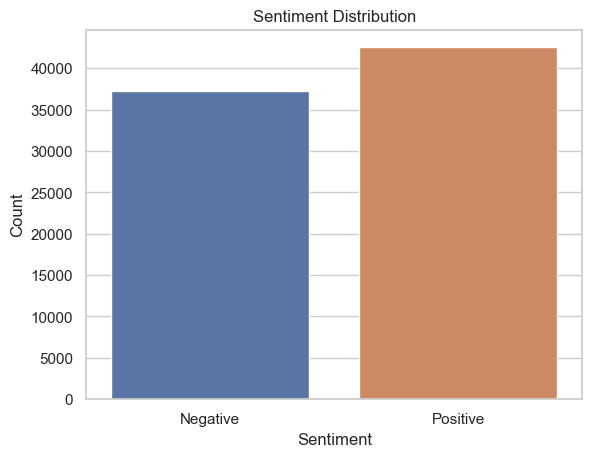

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='sentiment', data=data)
print(data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [14]:
plt.savefig('sentiment_distribution.png')


<Figure size 640x480 with 0 Axes>

In [29]:
#The goal is to correctly categorise each tweet as good or negative

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming your model and vectorizer are already trained and named 'model' and 'vectorizer'
# Load the sample tweets
sample_tweets = pd.read_csv('bjp_tweets.csv')  # replace with your file containing sample tweets

# Manually assessed sentiments (replace these with your actual assessments)
manual_sentiments = ['good', 'negative', 'good', 'good', 'negative']  # etc.

# Vectorize the sample tweets
sample_tweets_vec = vectorizer.transform(sample_tweets['tweet'])

# Predict sentiments
predicted_sentiments = model.predict(sample_tweets_vec)

# Convert numerical predictions to labels
predicted_labels = ['good' if sentiment == 1 else 'negative' for sentiment in predicted_sentiments]

# Compare predictions against manual assessments
for manual, predicted, tweet in zip(manual_sentiments, predicted_labels, sample_tweets['tweet']):
    print(f"Tweet: {tweet}\nManual Sentiment: {manual}, Predicted Sentiment: {predicted}\n")


Tweet: ndtv anchor let go over to aap live press conference the next thing you see sanjayazadsln bashing bjp with modiadanibhaibhai probably an awkward moment for everyone in the ndtv news room ca even stop the live stream midway manishsisodia bjp aap
Manual Sentiment: good, Predicted Sentiment: negative

Tweet: sambit patra attacks rahul gandhi over his cowardice remark watch video sambitpatra rahulgandhi china newsupdate bjp congress
Manual Sentiment: negative, Predicted Sentiment: negative

Tweet: crediting the bjp with taking development to smaller cities and towns pmmodi said the speed of growth has increased under the double engine govt he said shivamoggaairport had been inaugurated at a time when the number of air travellers was rising
Manual Sentiment: good, Predicted Sentiment: negative

Tweet: ktrbrs do do false allegations on iasassociation use smart ass kapilsibal pbhushan1 if burns so much go to court fear of losing power why on social media what proof do you have do jump 

In [31]:
#To examine the effect of regularly used words or phrases on sentiment classification

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re

# Load datasets
data_party1 = pd.read_csv('bjp_tweets.csv')  # Replace with your first dataset path
data_party2 = pd.read_csv('congress_tweets.csv')  # Replace with your second dataset path

# Function to clean text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)    # Remove punctuation and numbers
    return text

# Apply text cleaning
data_party1['tweet'] = data_party1['tweet'].apply(clean_text)
data_party2['tweet'] = data_party2['tweet'].apply(clean_text)

# You can either combine datasets or keep them separate
# If combining:
data_combined = pd.concat([data_party1, data_party2])
# Else, handle them separately

# Assuming combined dataset for this example
X_train, X_test, y_train, y_test = train_test_split(data_combined['tweet'], data_combined['target'], test_size=0.3, random_state=42)

# Feature extraction
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate the model
predictions = model.predict(X_test_vec)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.77      0.73      0.75     11092
           1       0.78      0.81      0.79     12827

    accuracy                           0.77     23919
   macro avg       0.77      0.77      0.77     23919
weighted avg       0.77      0.77      0.77     23919



In [36]:
#To assess the volume of data, count the total number of tweets from the specified party

In [38]:
import pandas as pd

# Load datasets
data_party1 = pd.read_csv('bjp_tweets.csv')  # Replace with your dataset path for party 1
data_party2 = pd.read_csv('congress_tweets.csv')  # Replace with your dataset path for party 2

# Count the total number of tweets for each party
total_tweets_party1 = len(data_party1)
total_tweets_party2 = len(data_party2)

print(f"Total number of tweets for Party 1: {total_tweets_party1}")
print(f"Total number of tweets for Party 2: {total_tweets_party2}")


Total number of tweets for Party 1: 49477
Total number of tweets for Party 2: 30252


In [39]:
#To understand typical tweet size, calculate the average length of tweets

In [40]:
import pandas as pd

# Load dataset
data_party1 = pd.read_csv('bjp_tweets.csv')  # Replace with your dataset path for party 1
data_party2 = pd.read_csv('congress_tweets.csv')  # Replace with your dataset path for party 2

# Function to calculate the average length of tweets
def average_tweet_length(data):
    tweet_lengths = data['tweet'].apply(len)
    return tweet_lengths.mean()

# Calculate average tweet length for each party
avg_length_party1 = average_tweet_length(data_party1)
avg_length_party2 = average_tweet_length(data_party2)

print(f"Average tweet length for Party 1: {avg_length_party1:.2f} characters")
print(f"Average tweet length for Party 2: {avg_length_party2:.2f} characters")


Average tweet length for Party 1: 167.25 characters
Average tweet length for Party 2: 161.95 characters


In [ ]:
#Determine the most popular tweet length and examine the content of tweets of this length.


In [44]:
import pandas as pd
from collections import Counter

# Load datasets from CSV files
data_party1 = pd.read_csv('bjp_tweets.csv')  # Replace with your first dataset path
data_party2 = pd.read_csv('congress_tweets.csv')  # Replace with your second dataset path

# Function to determine and analyze most common tweet length
def analyze_common_tweet_length(data, party_name):
    # Calculate tweet lengths
    data['tweet_length'] = data['tweet'].apply(len)

    # Find the most common tweet length
    most_common_length = data['tweet_length'].mode()[0]
    print(f"\nMost common tweet length for {party_name}: {most_common_length} characters")

    # Filter tweets with the most common length
    tweets_common_length = data[data['tweet_length'] == most_common_length]['tweet']

    # Display some tweets with the most common length
    print(f"\nSample tweets with the most common length for {party_name}:")
    print(tweets_common_length.sample(min(5, len(tweets_common_length))))  # Display 5 sample tweets or fewer if not enough tweets

# Analyze for both datasets
analyze_common_tweet_length(data_party1, "Party 1")
analyze_common_tweet_length(data_party2, "Party 2")




Most common tweet length for Party 1: 155 characters

Sample tweets with the most common length for Party 1:
2797     middleclasswithmodi modi govt pocket medicin e...
14521    hope cm arvindkejriw provid enough proof court...
17959    event differ result author raid kanimozhidmk s...
40816    narendramodi voting done in the morning for co...
506      few facts to consider before you vote bjp bjp4...
Name: tweet, dtype: object

Most common tweet length for Party 2: 137 characters

Sample tweets with the most common length for Party 2:
30222    nidhi smitaprakash on second thoughts this mig...
7107     stevecinsoc ilhanmn meghan mccain nazi vile fa...
15070    peopl want forti year benghazi hear support ca...
27849    this time rahulgandhi may seat in rajya sabha ...
13621    news kamalaharri say congress doesn t send gun...
Name: tweet, dtype: object


In [45]:
#Examine whether shorter tweets are more favourable or negative than longer tweets.

In [46]:
import pandas as pd

# Load datasets
data_party1 = pd.read_csv('bjp_tweets.csv')  # Replace with your first dataset path
data_party2 = pd.read_csv('congress_tweets.csv')  # Replace with your second dataset path

# Define a threshold for tweet length
length_threshold = 80  # Adjust this based on your analysis

# Function to categorize tweet length
def categorize_tweet_length(tweet):
    return 'Short' if len(tweet) <= length_threshold else 'Long'

# Function to analyze sentiment distribution based on tweet length
def analyze_sentiment_by_length(data, party_name):
    data['length_category'] = data['tweet'].apply(categorize_tweet_length)
    sentiment_distribution = data.groupby('length_category')['target'].value_counts(normalize=True)
    print(f"\nSentiment Distribution for {party_name} based on Tweet Length:")
    print(sentiment_distribution)

# Analyze for both datasets
analyze_sentiment_by_length(data_party1, "Party 1")
analyze_sentiment_by_length(data_party2, "Party 2")



Sentiment Distribution for Party 1 based on Tweet Length:
length_category  target
Long             1         0.504674
                 0         0.495326
Short            1         0.725236
                 0         0.274764
Name: target, dtype: float64

Sentiment Distribution for Party 2 based on Tweet Length:
length_category  target
Long             0         0.505253
                 1         0.494747
Short            1         0.729293
                 0         0.270707
Name: target, dtype: float64


In [49]:
#Perform a more in-depth comparative sentiment study of the two political parties,concentrating on major issues or events

In [50]:
import pandas as pd

# Load dataset
data = pd.read_csv('bjp_tweets.csv')  # Replace with your file path

# Calculate the length of each tweet
data['tweet_length'] = data['tweet'].apply(len)

# Define a threshold to categorize tweets as short or long
threshold = 80  # Example threshold, adjust as needed

# Categorize tweets
data['length_category'] = data['tweet_length'].apply(lambda x: 'Short' if x <= threshold else 'Long')

# Analyze sentiment distribution for short and long tweets
short_tweets_sentiment = data[data['length_category'] == 'Short']['target'].value_counts(normalize=True)
long_tweets_sentiment = data[data['length_category'] == 'Long']['target'].value_counts(normalize=True)

print("Sentiment distribution for short tweets:")
print(short_tweets_sentiment)

print("\nSentiment distribution for long tweets:")
print(long_tweets_sentiment)



Sentiment distribution for short tweets:
1    0.725236
0    0.274764
Name: target, dtype: float64

Sentiment distribution for long tweets:
1    0.504674
0    0.495326
Name: target, dtype: float64


In [51]:
import pandas as pd

# Load dataset
data = pd.read_csv('congress_tweets.csv')  # Replace with your file path

# Calculate the length of each tweet
data['tweet_length'] = data['tweet'].apply(len)

# Define a threshold to categorize tweets as short or long
threshold = 80  # Example threshold, adjust as needed

# Categorize tweets
data['length_category'] = data['tweet_length'].apply(lambda x: 'Short' if x <= threshold else 'Long')

# Analyze sentiment distribution for short and long tweets
short_tweets_sentiment = data[data['length_category'] == 'Short']['target'].value_counts(normalize=True)
long_tweets_sentiment = data[data['length_category'] == 'Long']['target'].value_counts(normalize=True)

print("Sentiment distribution for short tweets:")
print(short_tweets_sentiment)

print("\nSentiment distribution for long tweets:")
print(long_tweets_sentiment)


Sentiment distribution for short tweets:
1    0.729293
0    0.270707
Name: target, dtype: float64

Sentiment distribution for long tweets:
0    0.505253
1    0.494747
Name: target, dtype: float64
